# Project: Investigate a Dataset  Of the No show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### This project about collecting information about patients show up for their appointment or not and this information collected from 100k medical appointments in Brazil, and this information we should collect a knowledge of why there are patients didn't showed up and alot more.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pa=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
pa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### we will check for the column and rows of data

In [3]:
pa.shape

(110527, 14)

#### a simple info about the data so we can now if there any missing data or any type need to be changed

In [4]:
pa.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### breif description of data count,mean ,min..etc

In [5]:
pa.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### companson of two diseases that occur on patients have and see which one is more

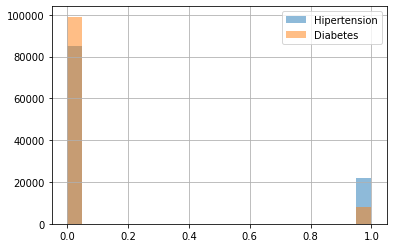

In [28]:
pa.Hipertension.hist(alpha=0.5 ,bins=20, label='Hipertension');
pa.Diabetes.hist(alpha=0.5 ,bins=20, label='Diabetes');
plt.legend();

In [8]:
pa.drop(['PatientId' ,'AppointmentID'], axis=1 , inplace=True)
pa.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning (Replace this with more specific notes!)

#### we have a problem the date is string so we will chage it

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [12]:
pa['ScheduledDay']=pd.to_datetime(pa['ScheduledDay'])

In [13]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  object             
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 10.1+ MB


### we will make sure that the dataset is good

In [14]:
pa.loc[pa['Age'] == 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,F,2016-04-29 08:08:43+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27 10:46:12+00:00,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25 13:28:21+00:00,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27 10:48:50+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29 08:53:02+00:00,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16 12:30:58+00:00,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-06 14:22:34+00:00,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03 15:18:44+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03 08:56:51+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


### we have a problem here there is no age equals to 0 even the new born childern will be in days or month or even hours no age exists equals to zero 

### we will take all the indexes that have the age zero so we can drop it

In [15]:
zero_age=pa.loc[pa['Age'] == 0].index.tolist()
zero_age

[59,
 63,
 64,
 65,
 67,
 89,
 101,
 104,
 132,
 150,
 188,
 192,
 193,
 194,
 250,
 256,
 266,
 292,
 305,
 306,
 310,
 358,
 359,
 366,
 377,
 434,
 524,
 525,
 526,
 565,
 586,
 732,
 742,
 779,
 795,
 809,
 888,
 1039,
 1042,
 1076,
 1081,
 1086,
 1087,
 1145,
 1165,
 1181,
 1197,
 1201,
 1204,
 1206,
 1208,
 1216,
 1218,
 1220,
 1487,
 1488,
 1490,
 1491,
 1493,
 1494,
 1498,
 1530,
 1546,
 1548,
 1555,
 1580,
 1650,
 1743,
 1745,
 1750,
 1823,
 1871,
 1872,
 1874,
 1875,
 1918,
 1919,
 1947,
 2087,
 2095,
 2096,
 2215,
 2217,
 2325,
 2347,
 2348,
 2363,
 2365,
 2433,
 2435,
 2436,
 2440,
 2442,
 2443,
 2446,
 2492,
 2541,
 2543,
 2544,
 2669,
 2670,
 2671,
 2672,
 2674,
 2675,
 2676,
 2677,
 2678,
 2707,
 2708,
 2709,
 2716,
 2823,
 2824,
 2864,
 2875,
 2896,
 2898,
 2932,
 2965,
 2967,
 2969,
 2970,
 2972,
 2975,
 2977,
 2978,
 3033,
 3037,
 3039,
 3232,
 3305,
 3309,
 3386,
 3423,
 3778,
 3782,
 3784,
 3787,
 3790,
 3793,
 3794,
 3795,
 3797,
 3800,
 3808,
 3813,
 3818,
 3820,


### after getting the indexes we will drop it 

In [16]:
pa.drop(pa.index[zero_age], inplace=True)

### now we will check if our data is good or not and make sure that all the Patient who's age are zero are deleted

In [17]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106988 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106988 non-null  object             
 1   ScheduledDay    106988 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106988 non-null  object             
 3   Age             106988 non-null  int64              
 4   Neighbourhood   106988 non-null  object             
 5   Scholarship     106988 non-null  int64              
 6   Hipertension    106988 non-null  int64              
 7   Diabetes        106988 non-null  int64              
 8   Alcoholism      106988 non-null  int64              
 9   Handcap         106988 non-null  int64              
 10  SMS_received    106988 non-null  int64              
 11  No-show         106988 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 10.6+ MB


### we will check if it exists or not

In [18]:
pa.loc[pa['Age'] == 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id='eda'></a>
## Exploratory Data Analysis

.

### Q1: acording to there attends which higher the Patients whoes showed up or the pationts that didn't showed to their appointments?

In [19]:
showed=pa.loc[pa['No-show'] == 'No'].count()
non_showed=pa.loc[pa['No-show'] == 'Yes'].count()
showed_mean=showed.mean()
non_show_mean=non_showed.mean()

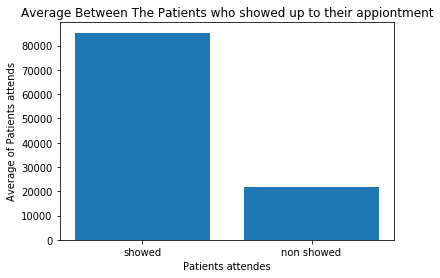

In [20]:
locations = [1, 2]
heights = [showed_mean, non_show_mean]
labels = ['showed', 'non showed']
plt.bar(locations, heights, tick_label=labels )
plt.title('Average Between The Patients who showed up to their appiontment')
plt.xlabel('Patients attendes')
plt.ylabel('Average of Patients attends');

#### You see that the people who showed up is more than the people that didn't showed up we need to know the reason behind it

### companson of two diseases Diabetes and Hipertension on Genders to see which gender is higher than the other

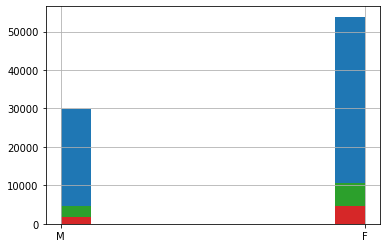

In [61]:
pa.groupby(['Hipertension' , 'Diabetes']).Gender.hist();

### we conclude that The Females has more Hipertension and Diabetes more than the Males

## we will take a look of all the visuals to understand every thing in this data

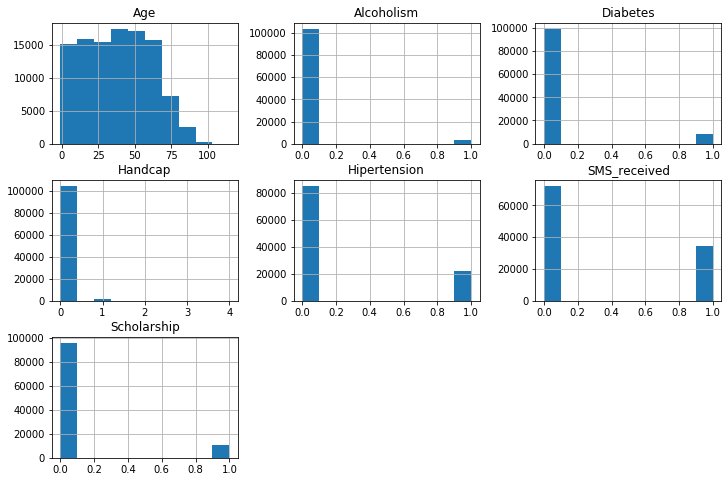

In [22]:
pa.hist(figsize=(12,8));

### Q2: does all the patients received the SMS messages for there appointment ?

In [23]:
pa.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106988.000000,106988.00000,106988.000000,106988.000000,106988.000000,106988.000000,106988.000000
mean,38.315718,0.10103,0.203771,0.074242,0.031405,0.022975,0.323261
std,22.466431,0.30137,0.402802,0.262165,0.174412,0.164114,0.467723
min,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.00000,1.000000,1.000000,1.000000,4.000000,1.000000


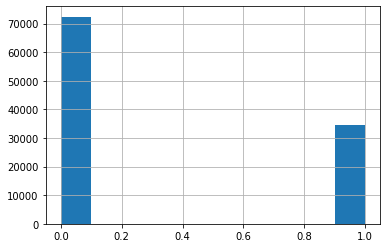

In [24]:
pa.SMS_received.hist();

### this means that alot of patients didn't received any messages to remainde them for their appointment, maybe these one of the reason some patient missed their appointment

### Q3: are all the Patients with Hipertension have also diabetes?

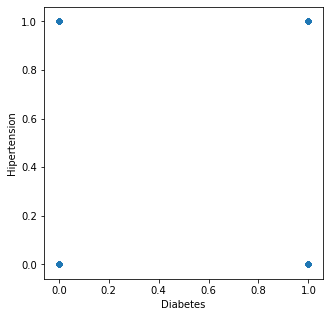

In [25]:
pa.plot.scatter(figsize=(5,5),x='Diabetes',y='Hipertension');

### no not necessary some time there are patients with diabetes and without any Hupertension 

<a id='conclusions'></a>
## Conclusions
#### The Conclusions is that we looked into the data and get a knowladge of why patient missed their appointment because a lot of them didn't received any message reminder of the appoitment , also we know that the patient who showed up is more than the patient that didn't showed up , also Males are higher than Females on the Hipertension and Diabetes , is not  necessary that all the patients with Hipertension also having Diabetes there is some cases that the have one diseases , alo we clean the data there are some ages with zero assigned to them and it's not possible age can be zero so we removed it and also we changed the type of date time 
